In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#c02 data file
data = np.loadtxt('c02.txt')

In [4]:
#extract the sea level at each time frame from the dataset
X_year = data[:, 2] #choose the last measurement for each year
Y_level = data[:, 4] #get the corresponding Y values


X_year = X_year.reshape(-1, 1) 
Y_level = Y_level.reshape(-1, 1)


Text(0, 0.5, 'CO2 Level')

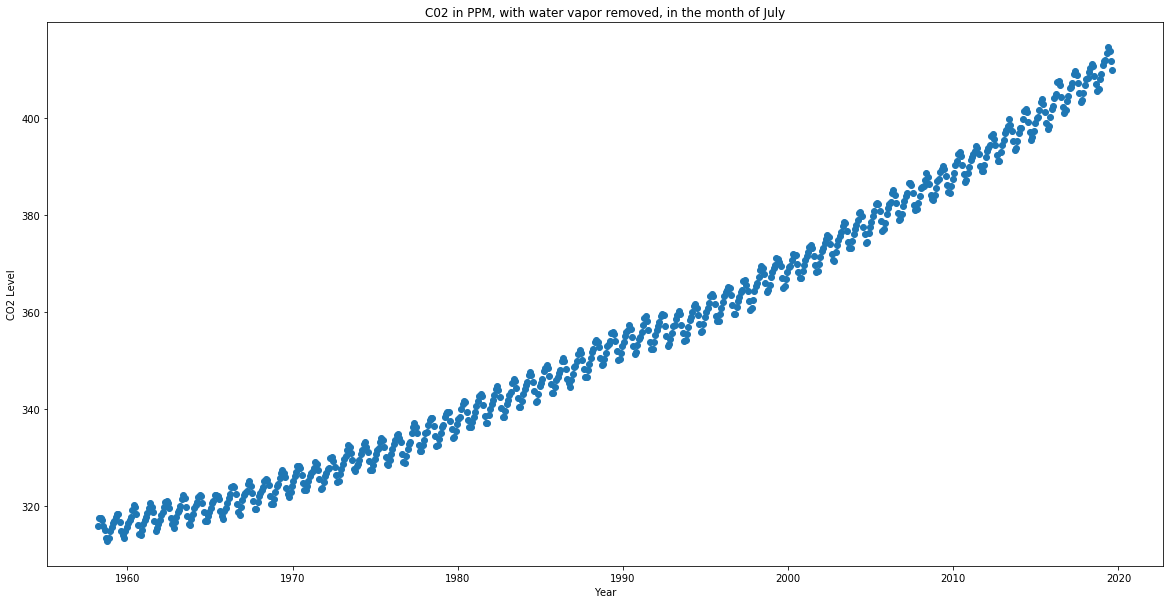

In [5]:
#plotting the data
plt.figure(figsize=(20, 10))
plt.scatter(X_year, Y_level, marker='o')
plt.title("C02 in PPM, with water vapor removed, in the month of July")
plt.xlabel("Year")
plt.ylabel("CO2 Level")


In [6]:
#TODO
#mean
mean =  np.mean(Y_level)
print(mean)


#variance
variance =  np.var(Y_level)
print(variance)


#range
rang =  np.ptp(Y_level)
print(rang)




354.49605691056905
789.3251496281974
102.0


In [7]:
#since the data is periodic in nature, we can isolate the specific point in the cycle 
#that we want to make prediction for. In this case, we are prediciting for 

X_year_9 = X_year[6::12, :] 
Y_level_9 = Y_level[6::12, :]

reg = LinearRegression().fit(X_year_9, Y_level_9)
reg_all = LinearRegression().fit(X_year, Y_level)


print(reg.coef_, reg.intercept_)
print(reg_all.coef_, reg_all.intercept_)


Y_next = reg.predict( [np.array(X_year[-1]) ] )

#prediction for the next 
print(Y_next)

[[1.54286251]] [-2717.37661635]
[[1.5642659]] [-2756.69845689]
[[398.62707356]]


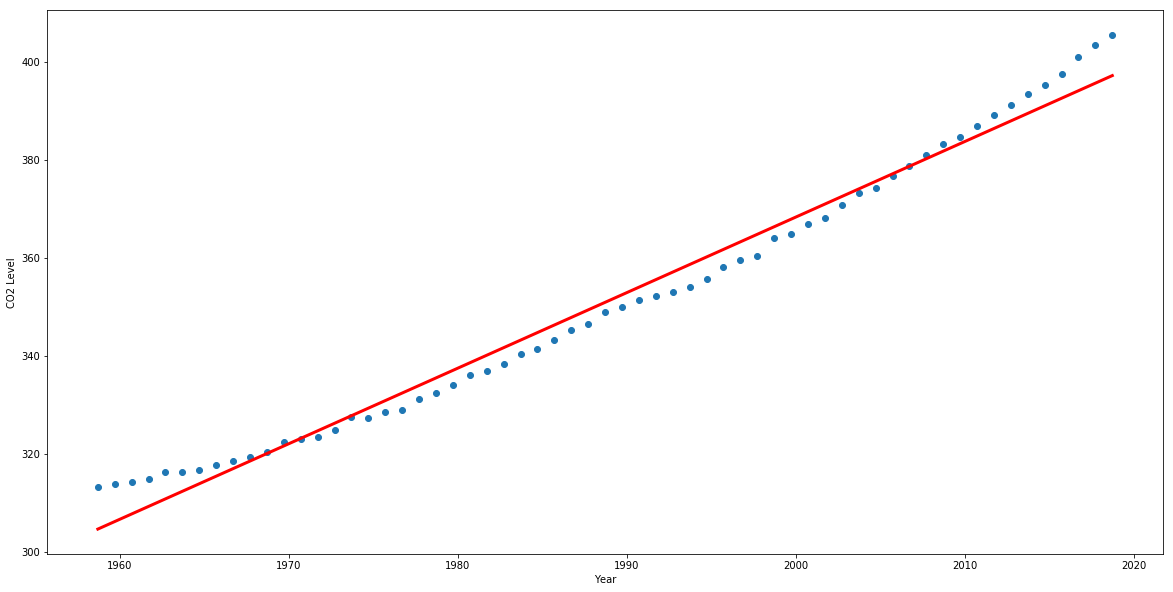

In [8]:
#plot the trendline
plt.figure(figsize=(20, 10))
prediction_space = np.linspace(min(X_year_9), max(X_year_9)).reshape(-1,1) 
plt.scatter(X_year_9,Y_level_9)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'red', linewidth = 3)
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.show()


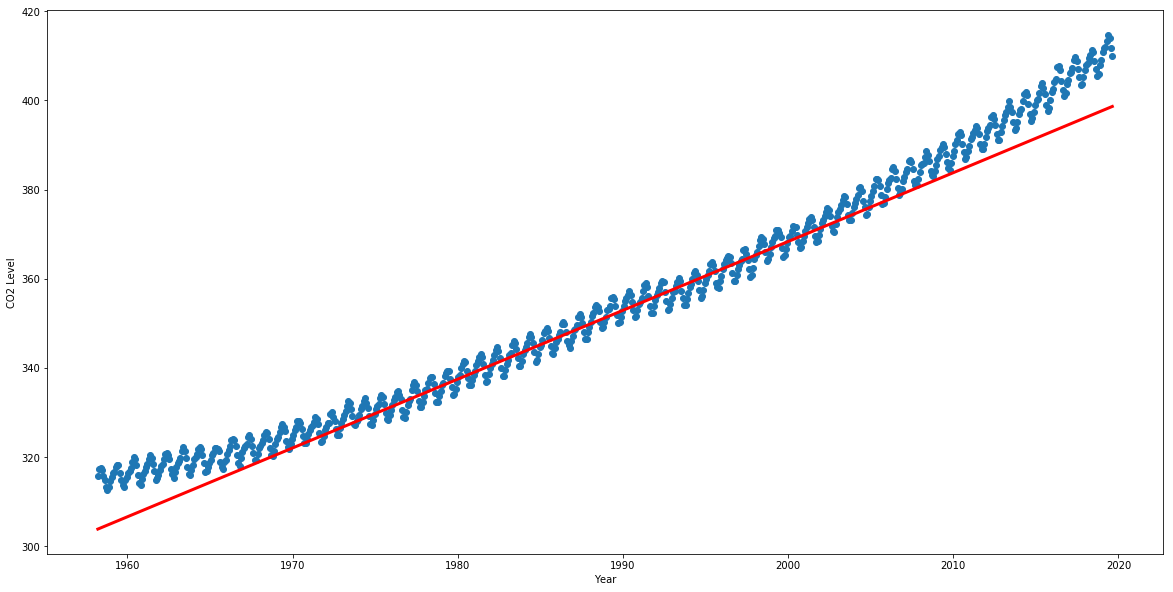

In [9]:
#plot the trendline
plt.figure(figsize=(20, 10))
prediction_space = np.linspace(min(X_year), max(X_year)).reshape(-1,1) 
plt.scatter(X_year,Y_level)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'red', linewidth = 3)
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.show()


In [10]:
#normalize the X and Y axis data
min_x = min(X_year)
max_x = max(X_year)
min_y = min(Y_level)
max_y = max(Y_level)

ydiff = max_y - min_y
xdiff = max_x - min_x

print(ydiff, xdiff)

print( min_x, max_x, min_y, max_y )

X_year_n = ( X_year - min_x ) / ( max_x - min_x )
Y_level_n =  ( Y_level - min_y ) / ( max_y - min_y )



[102.] [61.417]
[1958.208] [2019.625] [312.66] [414.66]


Text(0, 0.5, 'CO2 Level')

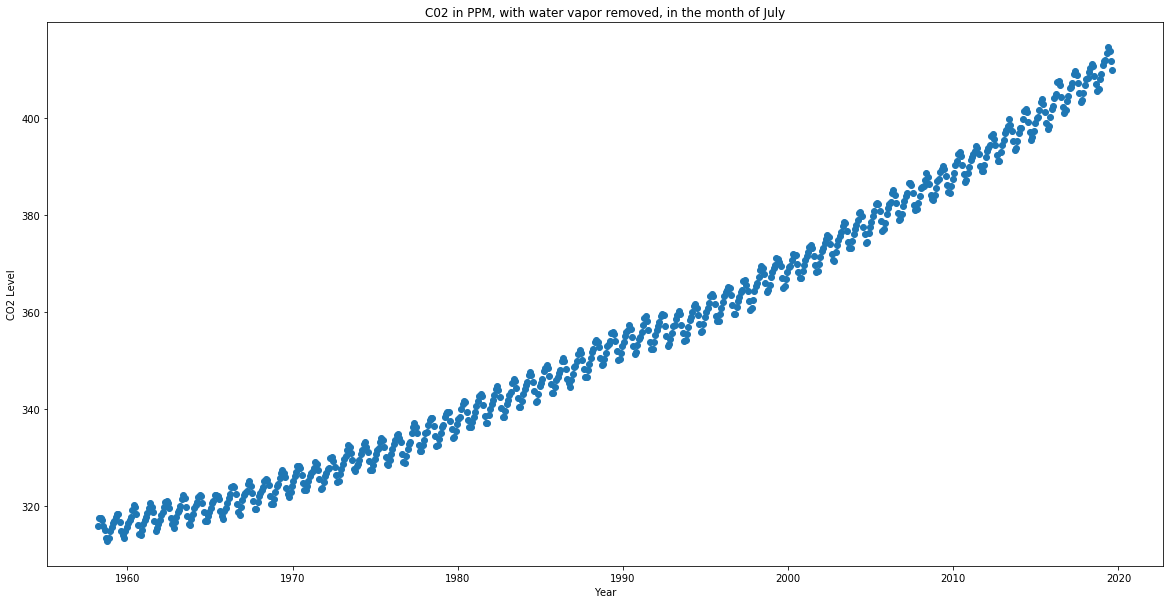

In [11]:
#plotting the data
plt.figure(figsize=(20, 10))
plt.scatter(X_year, Y_level, marker='o')
plt.title("C02 in PPM, with water vapor removed, in the month of July")
plt.xlabel("Year")
plt.ylabel("CO2 Level")

In [12]:
#manual gradient descent 

n_epochs = 400

n = float(len(X_year_n))

m = 0 #slope

c = 0 #intercept

L = 0.6 #learning rate

for epoch in range(n_epochs):
    Y_pred = (m*X_year_n) + c
    D_m = (-2/n) * np.sum(X_year_n * (Y_level_n - Y_pred)) #gradient with respect to m
    D_c = (-2/n) * np.sum(Y_level_n - Y_pred) #gradient with respect to c  
    m = m - (L * D_m)
    c = c - (L * D_c)

print(m, c)

0.9418874372653252 -0.06078885393083599


[102.] [61.417]
[1.5642659] [-2756.69845689]


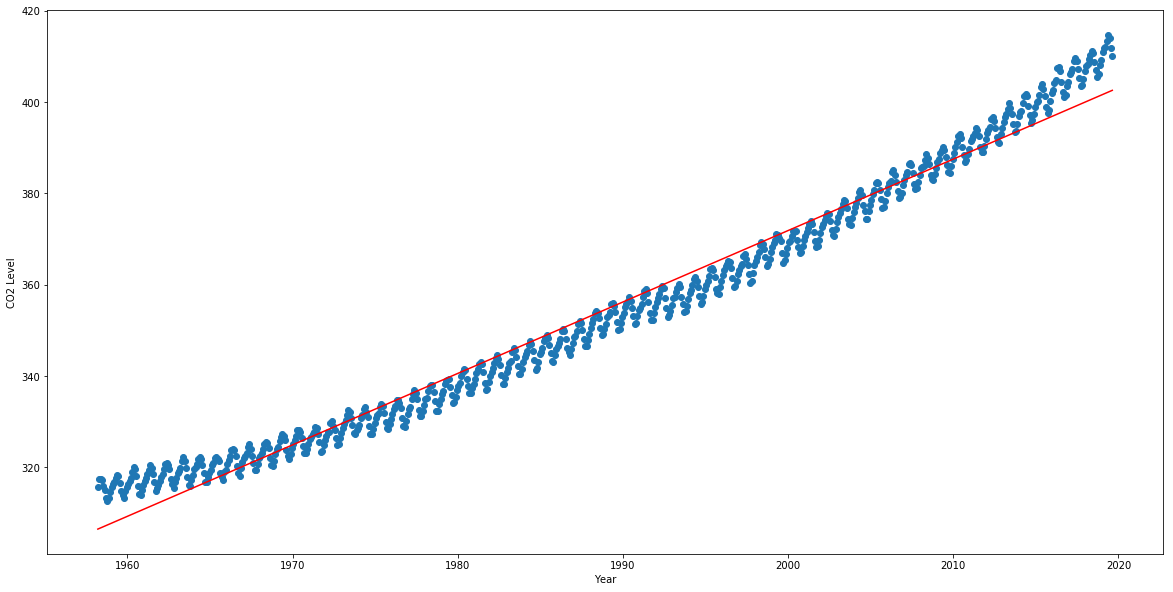

In [13]:
#plot the trendline again

plt.figure(figsize=(20, 10))
 
print(ydiff, xdiff)


M = m * ydiff / xdiff
C = min_y + (c*ydiff) - (m*ydiff*min_x/xdiff)

print(M ,C)

Y_pred = M * X_year + C

plt.scatter(X_year, Y_level) 
plt.plot([min(X_year), max(X_year)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.show()

In [14]:
#adjusted gradient descent 
n_epochs = 260


n = float(len(X_year_n))

m = 0 #slope
c = 0 #intercept

L = 0.5 #learning rate
incr = 0.3

def learning_rate(L, epoch):
    L = L * (1 + np.power(incr, epoch+1))
    return L


for epoch in range(n_epochs):
    Y_pred = (m*X_year_n) + c
    D_m = (-2/n) * np.sum(X_year_n * (Y_level_n - Y_pred)) #gradient with respect to m
    D_c = (-2/n) * np.sum(Y_level_n - Y_pred) #gradient with respect to c   
     
    L = learning_rate(L, epoch)
    
    m = m - (L * D_m)
    c = c - (L * D_c)

print(m, c)

0.9418874372630311 -0.06078885392960805


[102.] [61.417]
[1.5642659] [-2756.69845689]


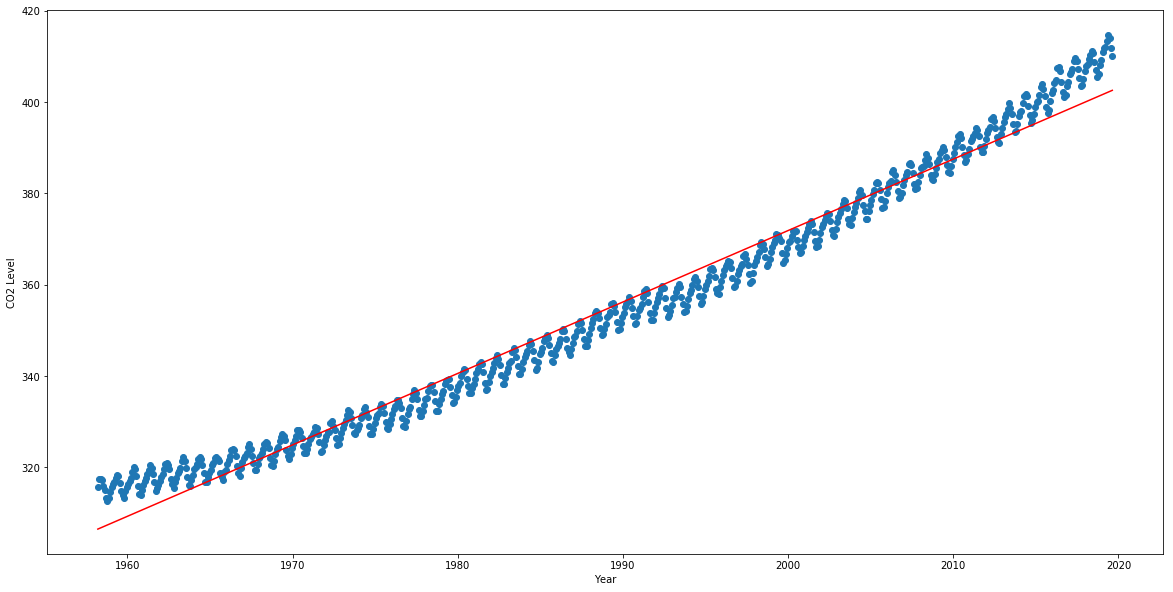

In [15]:
#plot the trendline again

plt.figure(figsize=(20, 10))
 

print(ydiff, xdiff)

M = m * ydiff / xdiff
C = min_y + (c*ydiff) - (m*ydiff*min_x/xdiff)

print(M ,C)

Y_pred = M * X_year + C

plt.scatter(X_year, Y_level) 
plt.plot([min(X_year), max(X_year)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.show()